0.0
1.0
0.24197072451914337


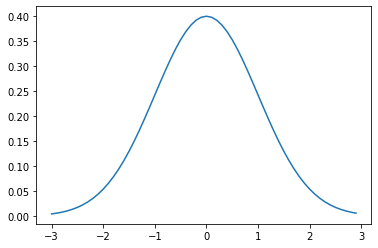

In [14]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

sn = stats.norm(loc=0, scale=1)
print(sn.mean())
print(sn.std())
print(sn.pdf(x=1))

x_plot = np.arange(-3.0,3.0,0.1)
plt.plot(x_plot,stats.norm.pdf(loc=0,scale=1,x=x_plot))

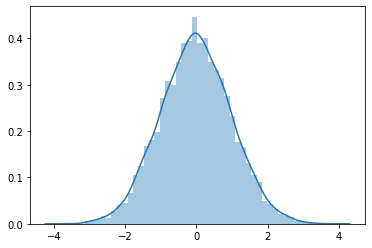

In [15]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sn = stats.norm.rvs(loc=0,scale=1,size=10000)
sn.mean()
sn.std()
sns.distplot(sn)

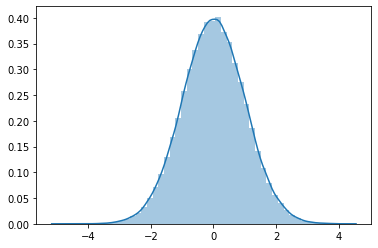

In [16]:
nr = np.random.randn(100000)
sns.distplot(nr)

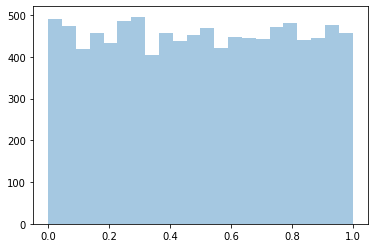

In [17]:
nr1 = np.random.rand(10000)
sns.distplot(nr1,kde=False)

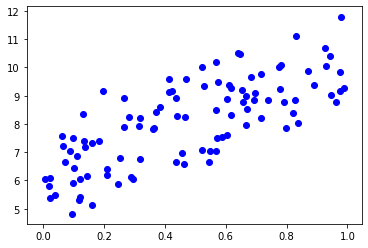

In [18]:
import pandas as pd

np.random.seed(0)
X = np.random.rand(100,1) #0~1사이의 (100,1)행렬 값 생성
y = 6 + 4*X+np.random.randn(100,1)
plt.scatter(X,y,c='blue')

In [ ]:
# 비용함수 
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    retrun cost

In [10]:
# 경사하강(교재 : page 294 ~ 300)
import webbrowser
webbrowser.open('https://angeloyeo.github.io/2020/08/16/gradient_descent.html')

True

In [ ]:
# 경사하강법과 편미분 연관지어서 이해!

In [ ]:
# 편미분


[비용 최소화]

- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w0, w1으로 순차적으로 편미분해 얻을 수 있다.
w1 편미분값 : $-2/N*sigmax*diff$, w0 편미분값 : $-2/N*sigma*diff$
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 마이너스 하면서 적용한다.
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데 이를 학습률이라고 한다.

In [19]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X,y,learning_rate=0.01):
    N=len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X,w1.T) + w0
    diff = y-y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
    return w1_update, w0_update

In [20]:
# 반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여
# w1과 w0를 업데이트 하는 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 

def gradient_descent_steps(X, y, iters=10000):
    # w0, w1을 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

In [22]:
# 예측 오차 비용 계산을 수행하는 함수 생성 및 경사하강법 수행
# square하는 이유: 오차가 마이너스가 나오면 안되므로

def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost
w1,w0= gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.4f} w0:{1:.4f}".format(w1[0,0],w0[0,0]))
y_pred = w1[0,0] * X + w0
print('GD Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1:3.7740 w0:6.3047
GD Total Cost:0.9947


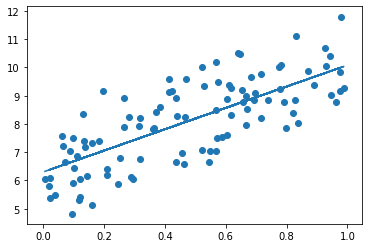

In [23]:
plt.scatter(X,y)
plt.plot(X,y_pred)

In [3]:
# np.square: array의 요소 단위로 제곱을 반환
np.square([[4,2,1]])

array([[16,  4,  1]], dtype=int32)

In [ ]:
# 확률적 경사 하강법: 일부 데이터만을 이용해서 w가 업데이트, 빠른 속도 보장.
# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출
# 경사 하강법과 (미니 배치) 확률 경사하강법은 성능상의 차이가 아주 작아,
# 큰 데이터를 처리할 경우 일반적으로 확률적 경사 하강법을 이용한다.

In [24]:
def stochastic_gradient_steps(X,y,batch_size=10,iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index=0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, 
        # sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 
        # 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,\
                                                 learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1,w0

In [25]:
w1,w0=stochastic_gradient_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3), 'w0:',round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('SGD Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 3.79 w0: 6.291
SGD Total Cost:0.9942
